# Literature Review Survey Processing

In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [4]:
survey_df = pd.read_csv("./data/Lit Review - Copy of Form Responses.csv", keep_default_na=False)
#fill in an NaNs with actual data so this keep default nonsense isnt needed


In [5]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31
0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,Long-Evan,...,group-housed,Does not specify,WT (wild type),yes,Yes,Sex,,,,
1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,Wister,...,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Housing History, Type (WT vs tran...",,,,
2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,ICR,...,Does not specify,Does not specify,WT (wild type),yes,Yes,Type (WT vs transgenic),,,,
3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,Wister,...,group-housed,Does not specify,WT (wild type),no,yes,"Sex, Strain, Type (WT vs transgenic)",,,,
4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,CD-1,...,group-housed,Does not specify,WT (wild type),no,yes,"Age, Sex, Strain, Type (WT vs transgenic)",,,,


In [6]:
survey_df.tail()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31
644,4/19/2022 11:37:06,The positive allosteric modulator of the mGlu2...,"Martinez-Pinteno, Albert",2020-07,Ezra Wright,"Ezra, good",yes,Mice,no,C57BL/6J,...,"Does not specify, singly-housed for less than ...",Does not specify,WT (wild type),yes,No,"Age, Strain, Type (WT vs transgenic)","Yes, this one was tricky.",I don't feel like sex of the mice was clarifie...,,
645,3/21/2022 14:02:30,Synaptic P-Rex1 signaling regulates hippocampa...,"Li, Jun",2015-12,Meghan Cum,,yes,Mice,no,C57BL6,...,group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Strain, Housing History","No, I feel confident, and I double-checked all...",,,
646,3/23/2022 18:54:10,A Temporal Activity of CA1 Neurons Underlying ...,"Chai, An-Ping",2021-07,Erika Wangia,,yes,Mice,no,C57BL/6,...,group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Strain, Housing History","Yes, this one was tricky.",I am unsure about the subject's age.,,
647,4/28/2022 17:50:43,Phospholipase D1 Ablation Disrupts Mouse Longi...,"Santa-Marinha, Luisa",2020-03,Ezra Wright,,yes,Mice,no,C57BL/6,...,Does not specify,Does not specify,WT (wild type),yes,No,"Age, Sex, Strain","No, I feel confident, and I double-checked all...",,,
648,4/19/2022 16:12:56,Trappc9 deficiency causes parent-of-origin dep...,"Liang, Zhengzheng",2020-09,Ezra Wright,"Ezra, good",yes,Mice,no,C57BL/6J,...,group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Strain, Housing History","Yes, this one was tricky.",Times during three chamber test and degree of ...,,


- Updating the dates to years

In [7]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

#create extra columns 1) if mice were used, 2) if rats were used 

In [8]:
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [9]:
survey_df["Mice used"]

0      0
1      0
2      1
3      0
4      1
      ..
644    1
645    1
646    1
647    1
648    1
Name: Mice used, Length: 649, dtype: object

In [10]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")

In [11]:
survey_df["Rats used"]

0      1
1      1
2      0
3      1
4      0
      ..
644    0
645    0
646    0
647    0
648    0
Name: Rats used, Length: 649, dtype: object

# Standarizing all the names

- Capitalizing all the names
    - Python treats all text that have different capitalization as seperate

In [12]:
all_strains = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].unique()

In [13]:
for strain in all_strains:
    print(strain)

Long-Evan 
Wister
ICR
Wister 
CD-1
Sprague-Dawley
Sprague-Dawley 
129/SvEv
Lister Hooded Rats
FVB/N
Hannover-Wistar rats
Wistar rats
C57BL/6J
Does not specify
Wistar Rats
Wistar 
Swiss
C57BL/6;BTBR
129S6/SvEvTac mixed C57BL/6NCrl
C57BL/6 
OF1/IC
C57BL/6BomTac
Wistar–Imamichi rats
Swiss mice
Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)
Swiss Mice
Does not specify 
CD1
C57BL/6
C57BL/6JXSJL
Wistar
C57B6/J
C57BL6/J
C57BL/6JOlaHsd
Wistar (Han) rats
Brattleboro rats
Long-Evans rats 
 C57/BL6
C57/BL6J
Sprague-Dawley Rats
C57Bl/6J
129Sv mixed C57BL/6J
BALB/c; Wistar; Sprague Dawley
Sprague–Dawley rat
Hannover-Wistar
CD
C57/BL6 mixed 129/SvJ
C57BL/6J; A/J
C57B6J 
Sprague Dawley 
mixed C57BL/6J-C57BL/6N-129S6
129S6
129/SvEv:C57BL/6J mixed
Sprague Dawley
C57BL/6N
Long-Evans
WAG/Rij; Wistar
129/SvJ mixed C57BL/GJ
C57-black6
Albino Sprague Dawley
C57BL mixed 129/Sv
Wistar rats; C57BL/6J
Long Evans
C57BL/6; BALB/cJ
129SvEv mixed C57BL/6J
Outbreed Albino NMRI
Swiss; C57/BL6
C57BL

In [14]:
capitalized_all_strains = {strain: strain.upper().strip().encode('ascii', errors='ignore').decode("utf-8")  for strain in all_strains}

In [15]:
capitalized_all_strains

{'Long-Evan ': 'LONG-EVAN',
 'Wister': 'WISTER',
 'ICR': 'ICR',
 'Wister ': 'WISTER',
 'CD-1': 'CD-1',
 'Sprague-Dawley': 'SPRAGUE-DAWLEY',
 'Sprague-Dawley ': 'SPRAGUE-DAWLEY',
 '129/SvEv': '129/SVEV',
 'Lister Hooded Rats': 'LISTER HOODED RATS',
 'FVB/N': 'FVB/N',
 'Hannover-Wistar rats': 'HANNOVER-WISTAR RATS',
 'Wistar rats': 'WISTAR RATS',
 'C57BL/6J': 'C57BL/6J',
 'Does not specify': 'DOES NOT SPECIFY',
 'Wistar Rats': 'WISTAR RATS',
 'Wistar ': 'WISTAR',
 'Swiss': 'SWISS',
 'C57BL/6;BTBR': 'C57BL/6;BTBR',
 '129S6/SvEvTac mixed C57BL/6NCrl': '129S6/SVEVTAC MIXED C57BL/6NCRL',
 'C57BL/6 ': 'C57BL/6',
 'OF1/IC': 'OF1/IC',
 'C57BL/6BomTac': 'C57BL/6BOMTAC',
 'Wistar–Imamichi rats': 'WISTARIMAMICHI RATS',
 'Swiss mice': 'SWISS MICE',
 'Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)': 'WISTAR KYOTO MORE IMMOBILE(WMI); WISTAR KYOTO LESS IMMOBILE (WLI)',
 'Swiss Mice': 'SWISS MICE',
 'Does not specify ': 'DOES NOT SPECIFY',
 'CD1': 'CD1',
 'C57BL/6': 'C57BL/6',
 'C57B

- Replacing all commas with semicolons

In [16]:
capitalized_all_strains = {key: value.replace(",", ";") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("-", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("WITH", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("W/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RATS", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RAT", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("MICE", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUE DAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUEDAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}


- All the different subjects should have a semicolon `;` seperating them.
    - So we will use this to identify multiple subjects

In [17]:
seperated_all_strains = {key: value.split(";") for key, value in capitalized_all_strains.items()}

In [18]:
seperated_all_strains

{'Long-Evan ': ['LONGEVAN'],
 'Wister': ['WISTER'],
 'ICR': ['ICR'],
 'Wister ': ['WISTER'],
 'CD-1': ['CD1'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Sprague-Dawley ': ['SPRAGUE_DAWLEY'],
 '129/SvEv': ['129SVEV'],
 'Lister Hooded Rats': ['LISTER HOODED '],
 'FVB/N': ['FVBN'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR '],
 'Wistar rats': ['WISTAR '],
 'C57BL/6J': ['C57BL6J'],
 'Does not specify': ['DOES NOT SPECIFY'],
 'Wistar Rats': ['WISTAR '],
 'Wistar ': ['WISTAR'],
 'Swiss': ['SWISS'],
 'C57BL/6;BTBR': ['C57BL6', 'BTBR'],
 '129S6/SvEvTac mixed C57BL/6NCrl': ['129S6SVEVTAC MIXED C57BL6NCRL'],
 'C57BL/6 ': ['C57BL6'],
 'OF1/IC': ['OF1IC'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Wistar–Imamichi rats': ['WISTARIMAMICHI '],
 'Swiss mice': ['SWISS '],
 'Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)': ['WISTAR KYOTO MORE IMMOBILE(WMI)',
  ' WISTAR KYOTO LESS IMMOBILE (WLI)'],
 'Swiss Mice': ['SWISS '],
 'Does not specify ': ['DOES NOT SPECIFY'],
 'CD1': ['CD1'],
 'C57

- All the mixed mice should have the word "MIXED" in them so we will use that to identify the different strains

In [19]:
seperated_all_strains

{'Long-Evan ': ['LONGEVAN'],
 'Wister': ['WISTER'],
 'ICR': ['ICR'],
 'Wister ': ['WISTER'],
 'CD-1': ['CD1'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Sprague-Dawley ': ['SPRAGUE_DAWLEY'],
 '129/SvEv': ['129SVEV'],
 'Lister Hooded Rats': ['LISTER HOODED '],
 'FVB/N': ['FVBN'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR '],
 'Wistar rats': ['WISTAR '],
 'C57BL/6J': ['C57BL6J'],
 'Does not specify': ['DOES NOT SPECIFY'],
 'Wistar Rats': ['WISTAR '],
 'Wistar ': ['WISTAR'],
 'Swiss': ['SWISS'],
 'C57BL/6;BTBR': ['C57BL6', 'BTBR'],
 '129S6/SvEvTac mixed C57BL/6NCrl': ['129S6SVEVTAC MIXED C57BL6NCRL'],
 'C57BL/6 ': ['C57BL6'],
 'OF1/IC': ['OF1IC'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Wistar–Imamichi rats': ['WISTARIMAMICHI '],
 'Swiss mice': ['SWISS '],
 'Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)': ['WISTAR KYOTO MORE IMMOBILE(WMI)',
  ' WISTAR KYOTO LESS IMMOBILE (WLI)'],
 'Swiss Mice': ['SWISS '],
 'Does not specify ': ['DOES NOT SPECIFY'],
 'CD1': ['CD1'],
 'C57

In [20]:
# Listing out all strains in a paper regardless of it was mixed or not
listing_all_strains = {}
# Seperating all the strains that were not in the same subject
subject_seperated_strains = {}

for key, value in seperated_all_strains.items():
    
    all_strains_for_paper = []
    all_subjects_for_paper = []
    
    for mixed_strain in value:
#         all_strains = [strain.strip() for strain in mixed_strain.split("MIXED")] 
        all_strains = [strain.strip().replace("  ", "_").replace(" ", "_") for strain in re.split(" X |MIXED|BACKCROSSED|AND|&", mixed_strain) if len(strain) >= 2]   
        all_strains_for_paper.extend(all_strains)
        all_subjects_for_paper.append(" mixed ".join(sorted(all_strains)))
        
    listing_all_strains[key] = all_strains_for_paper
    subject_seperated_strains[key] = all_subjects_for_paper

In [21]:
listing_all_strains

{'Long-Evan ': ['LONGEVAN'],
 'Wister': ['WISTER'],
 'ICR': ['ICR'],
 'Wister ': ['WISTER'],
 'CD-1': ['CD1'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Sprague-Dawley ': ['SPRAGUE_DAWLEY'],
 '129/SvEv': ['129SVEV'],
 'Lister Hooded Rats': ['LISTER_HOODED'],
 'FVB/N': ['FVBN'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR'],
 'Wistar rats': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 'Does not specify': ['DOES_NOT_SPECIFY'],
 'Wistar Rats': ['WISTAR'],
 'Wistar ': ['WISTAR'],
 'Swiss': ['SWISS'],
 'C57BL/6;BTBR': ['C57BL6', 'BTBR'],
 '129S6/SvEvTac mixed C57BL/6NCrl': ['129S6SVEVTAC', 'C57BL6NCRL'],
 'C57BL/6 ': ['C57BL6'],
 'OF1/IC': ['OF1IC'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Wistar–Imamichi rats': ['WISTARIMAMICHI'],
 'Swiss mice': ['SWISS'],
 'Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)': ['WISTAR_KYOTO_MORE_IMMOBILE(WMI)',
  'WISTAR_KYOTO_LESS_IMMOBILE_(WLI)'],
 'Swiss Mice': ['SWISS'],
 'Does not specify ': ['DOES_NOT_SPECIFY'],
 'CD1': ['CD1'],
 'C57BL/6': ['C5

In [22]:
subject_seperated_strains

{'Long-Evan ': ['LONGEVAN'],
 'Wister': ['WISTER'],
 'ICR': ['ICR'],
 'Wister ': ['WISTER'],
 'CD-1': ['CD1'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Sprague-Dawley ': ['SPRAGUE_DAWLEY'],
 '129/SvEv': ['129SVEV'],
 'Lister Hooded Rats': ['LISTER_HOODED'],
 'FVB/N': ['FVBN'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR'],
 'Wistar rats': ['WISTAR'],
 'C57BL/6J': ['C57BL6J'],
 'Does not specify': ['DOES_NOT_SPECIFY'],
 'Wistar Rats': ['WISTAR'],
 'Wistar ': ['WISTAR'],
 'Swiss': ['SWISS'],
 'C57BL/6;BTBR': ['C57BL6', 'BTBR'],
 '129S6/SvEvTac mixed C57BL/6NCrl': ['129S6SVEVTAC mixed C57BL6NCRL'],
 'C57BL/6 ': ['C57BL6'],
 'OF1/IC': ['OF1IC'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Wistar–Imamichi rats': ['WISTARIMAMICHI'],
 'Swiss mice': ['SWISS'],
 'Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)': ['WISTAR_KYOTO_MORE_IMMOBILE(WMI)',
  'WISTAR_KYOTO_LESS_IMMOBILE_(WLI)'],
 'Swiss Mice': ['SWISS'],
 'Does not specify ': ['DOES_NOT_SPECIFY'],
 'CD1': ['CD1'],
 'C57BL/6': [

In [23]:
survey_df["all_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(listing_all_strains)
survey_df["per_subject_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(subject_seperated_strains)

In [24]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,Long-Evan,...,Sex,,,,,2006,0,1,[LONGEVAN],[LONGEVAN]
1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,Wister,...,"Sex, Strain, Housing History, Type (WT vs tran...",,,,,2006,0,1,[WISTER],[WISTER]
2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,ICR,...,Type (WT vs transgenic),,,,,2006,1,0,[ICR],[ICR]
3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,Wister,...,"Sex, Strain, Type (WT vs transgenic)",,,,,2006,0,1,[WISTER],[WISTER]
4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,CD-1,...,"Age, Sex, Strain, Type (WT vs transgenic)",,,,,2006,1,0,[CD1],[CD1]


In [25]:
survey_df.to_csv("./proc/literature_review_processed_strains.csv")

In [26]:
all_listed_strain_counts_df = pd.Series(Counter(chain(*survey_df["all_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [27]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
39,C57BL6J,155
99,WISTAR,141
36,C57BL6,82
92,SPRAGUE_DAWLEY,78
61,CD1,29
49,C57BL6N,23
93,SWISS,19
66,DOES_NOT_SPECIFY,17
15,129SVJ,10
9,129SV,9


In [28]:
per_subject_strain_counts_df = pd.Series(Counter(chain(*survey_df["per_subject_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [29]:
per_subject_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
116,WISTAR,141
59,C57BL6J,136
110,SPRAGUE_DAWLEY,78
56,C57BL6,75
80,CD1,29
72,C57BL6N,20
111,SWISS,19
84,DOES_NOT_SPECIFY,17
100,LONGEVANS,8
68,C57BL6JOLAHSD,6


- Checking why different amounts of "C57BL6J"
    - So there is less in `per_subject_strain_counts_df` because some of the "C57BL6J" are in a mixed group. But if you look at the total, it's all the same

In [30]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
39,C57BL6J,155
45,C57BL6JOLAHSD,6
41,C57BL6JC57BL6N129S6,2
46,C57BL6JRJ,2
3,129C57BL6J,1


In [31]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
59,C57BL6J,136
68,C57BL6JOLAHSD,6
51,C3HHEJ mixed C57BL6J,4
69,C57BL6JRJ,2
15,129SV mixed C57BL6J,2


In [32]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

In [33]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

- Options
    - A list of tuples
    - A list of strings
    - https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe
        - Split list into rows and into strings
        - Or just split all the strains into rows

- Creating a row for each subject

In [34]:
all_processed_strains_df = survey_df.explode("all_processed_strains").reset_index()
per_subject_processed_strains_df = survey_df.explode("per_subject_processed_strains").reset_index()

In [35]:
all_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,...,Sex,,,,,2006,0,1,LONGEVAN,[LONGEVAN]
1,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Housing History, Type (WT vs tran...",,,,,2006,0,1,WISTER,[WISTER]
2,2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,...,Type (WT vs transgenic),,,,,2006,1,0,ICR,[ICR]
3,3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Type (WT vs transgenic)",,,,,2006,0,1,WISTER,[WISTER]
4,4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,...,"Age, Sex, Strain, Type (WT vs transgenic)",,,,,2006,1,0,CD1,[CD1]


In [36]:
per_subject_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,...,Sex,,,,,2006,0,1,[LONGEVAN],LONGEVAN
1,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Housing History, Type (WT vs tran...",,,,,2006,0,1,[WISTER],WISTER
2,2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,...,Type (WT vs transgenic),,,,,2006,1,0,[ICR],ICR
3,3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Type (WT vs transgenic)",,,,,2006,0,1,[WISTER],WISTER
4,4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,...,"Age, Sex, Strain, Type (WT vs transgenic)",,,,,2006,1,0,[CD1],CD1


In [37]:
all_processed_strains_df.to_csv("./proc/literature_review_row_per_every_strain.csv")

In [38]:
per_subject_processed_strains_df.to_csv("./proc/literature_review_row_per_mixed_strain.csv")

- Getting a list of strains with the highest counts

In [39]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=11)

,Strain,Counts
39,C57BL6J,155
99,WISTAR,141
36,C57BL6,82
92,SPRAGUE_DAWLEY,78
61,CD1,29
49,C57BL6N,23
93,SWISS,19
66,DOES_NOT_SPECIFY,17
15,129SVJ,10
9,129SV,9


In [40]:
most_common_strains = list(all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=10)["Strain"])

In [41]:
most_common_strains

['C57BL6J',
 'WISTAR',
 'C57BL6',
 'SPRAGUE_DAWLEY',
 'CD1',
 'C57BL6N',
 'SWISS',
 'DOES_NOT_SPECIFY',
 '129SVJ',
 '129SV']

In [42]:
all_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,...,Sex,,,,,2006,0,1,LONGEVAN,[LONGEVAN]
1,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Housing History, Type (WT vs tran...",,,,,2006,0,1,WISTER,[WISTER]
2,2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,...,Type (WT vs transgenic),,,,,2006,1,0,ICR,[ICR]
3,3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,...,"Sex, Strain, Type (WT vs transgenic)",,,,,2006,0,1,WISTER,[WISTER]
4,4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,...,"Age, Sex, Strain, Type (WT vs transgenic)",,,,,2006,1,0,CD1,[CD1]


In [43]:
strain_year_count = all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()

In [44]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,Mice used,Rats used,per_subject_processed_strains
0,2000,C57BL6J,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2000,WISTAR,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [45]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

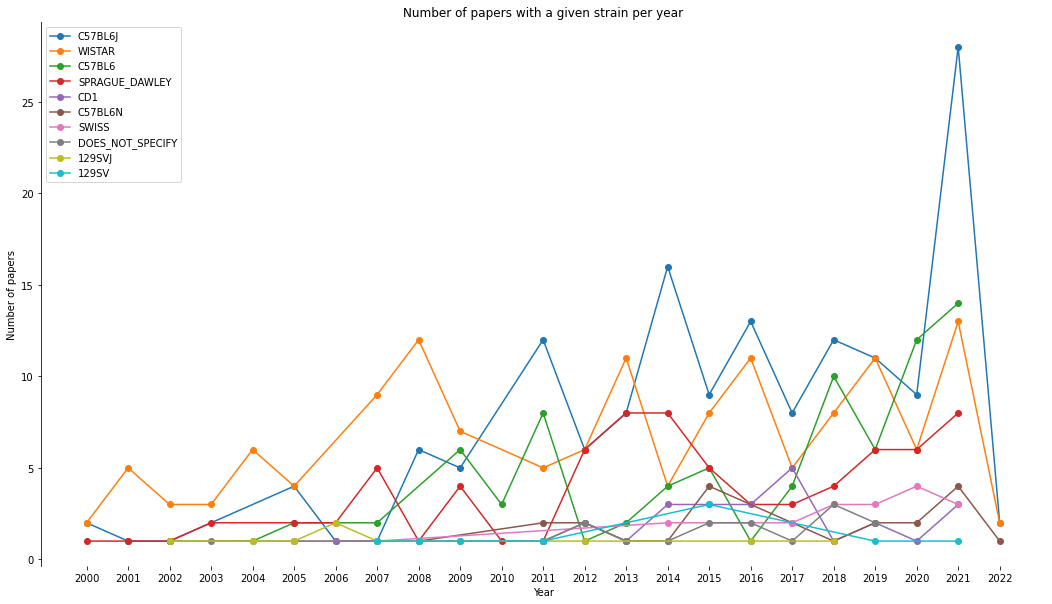

In [46]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]
    ax.plot(strain_df["publication_year"], strain_df["index"], '-o', label=strain)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)

plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_strain.png")

In [47]:
all_processed_strains_df["Publication Date (YYYY-MM)"][0]

'2006-03'

## Trends in Sex of the Subject

In [48]:
survey_df["Subject Sex"]

0           Male
1         Female
2           Male
3           Male
4         Female
         ...    
644    Uses both
645         Male
646         Male
647         Male
648    Uses both
Name: Subject Sex, Length: 649, dtype: object

In [49]:
sex_year_count = all_processed_strains_df.groupby(['publication_year','Subject Sex'], as_index=False).count()

In [50]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

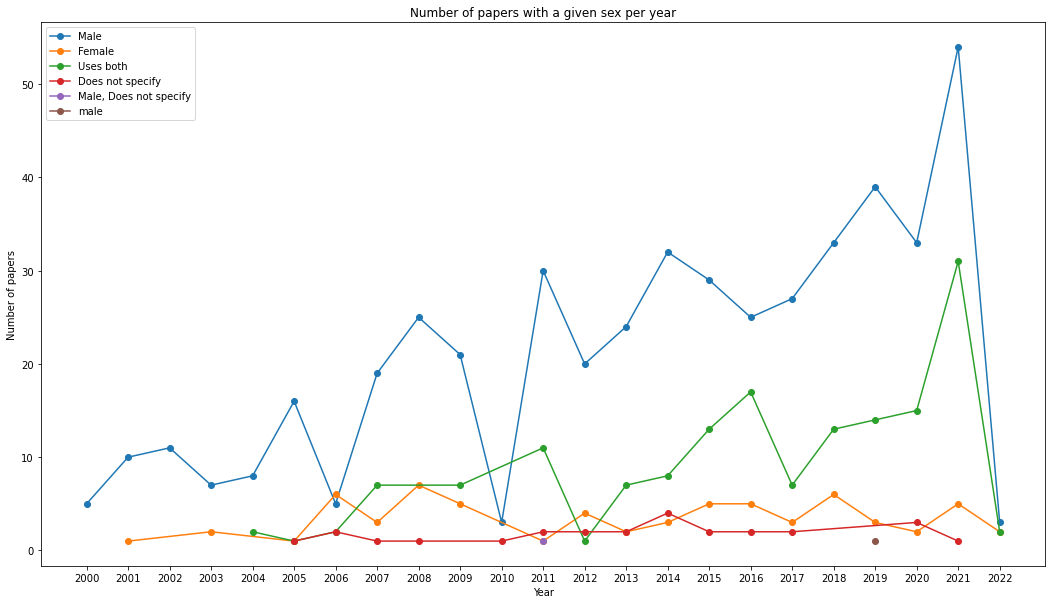

In [51]:
fig, ax = plt.subplots()

for sex in sex_year_count["Subject Sex"].unique():
    sex_df = sex_year_count[sex_year_count["Subject Sex"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["index"], '-o', label=sex)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given sex per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_sex.png")

## Trends in Type of the Subject

In [52]:
survey_df["Subject Type"]

0                             WT (wild type)
1                             WT (wild type)
2                             WT (wild type)
3                             WT (wild type)
4                             WT (wild type)
                       ...                  
644                           WT (wild type)
645                                     both
646    transgenic (Cre or Flp line, KO line)
647    transgenic (Cre or Flp line, KO line)
648    transgenic (Cre or Flp line, KO line)
Name: Subject Type, Length: 649, dtype: object

In [53]:
type_year_count = all_processed_strains_df.groupby(['publication_year','Subject Type'], as_index=False).count()

In [54]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

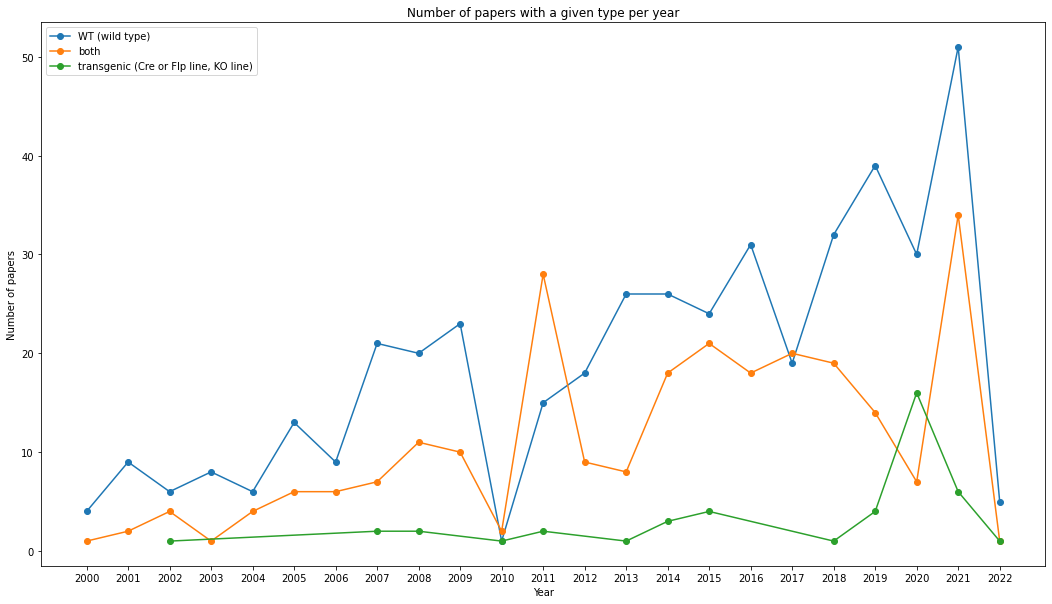

In [55]:
fig, ax = plt.subplots()

for subject_type in type_year_count["Subject Type"].unique():
    type_df = type_year_count[type_year_count["Subject Type"] == subject_type]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=subject_type)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given type per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_type.png")

## Trends in Age of the Subject

In [56]:
survey_df["Subject Age"]

0                           young adult (8-12 weeks)
1                         adult (week not specified)
2         juvenile (3-7 weeks or week not specified)
3               adult (12-24 weeks), old (+40 weeks)
4                                adult (12-24 weeks)
                           ...                      
644                              adult (24-40 weeks)
645       juvenile (3-7 weeks or week not specified)
646                         young adult (8-12 weeks)
647                              adult (12-24 weeks)
648    young adult (8-12 weeks), adult (12-24 weeks)
Name: Subject Age, Length: 649, dtype: object

In [57]:
column_name = "Subject Age"

In [58]:
fixed_column_name = column_name + "_fixed"

In [59]:
copy_of_survey_df = survey_df.copy()

In [60]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [61]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [62]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [63]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

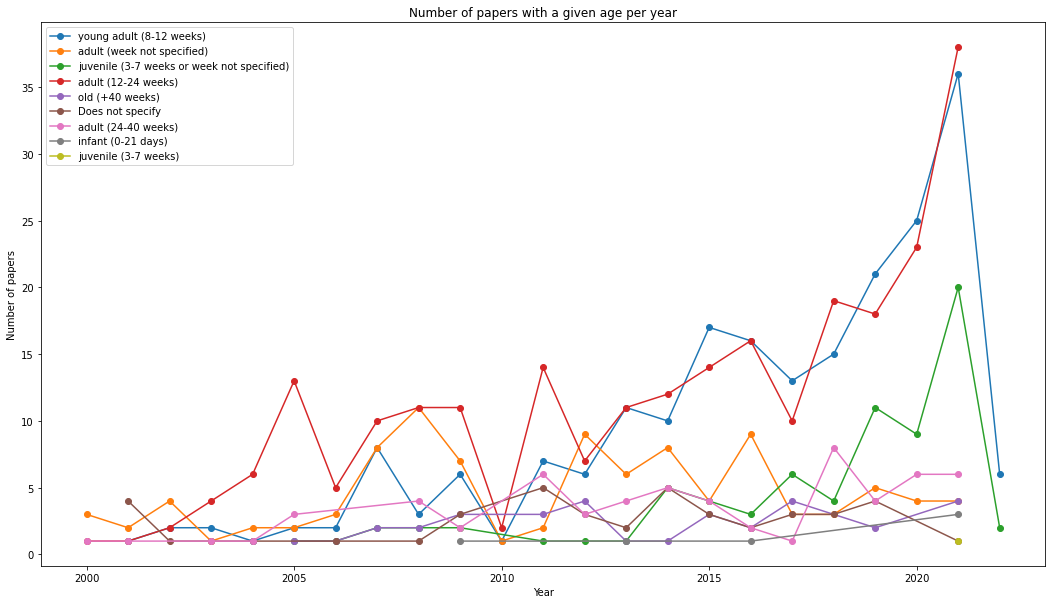

In [64]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given age per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_age.png")

## Trends in Housing of the Subject

In [65]:
survey_df["Subject Housing"]

0                                           group-housed
1                                           group-housed
2                                           group-housed
3                                          singly-housed
4      singly-housed for less than a week before expe...
                             ...                        
644                                     Does not specify
645                                         group-housed
646                                         group-housed
647                                     Does not specify
648                                         group-housed
Name: Subject Housing, Length: 649, dtype: object

In [66]:
column_name = "Subject Housing"

In [67]:
fixed_column_name = column_name + "_fixed"

In [68]:
copy_of_survey_df = survey_df.copy()

In [69]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [70]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [71]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [72]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

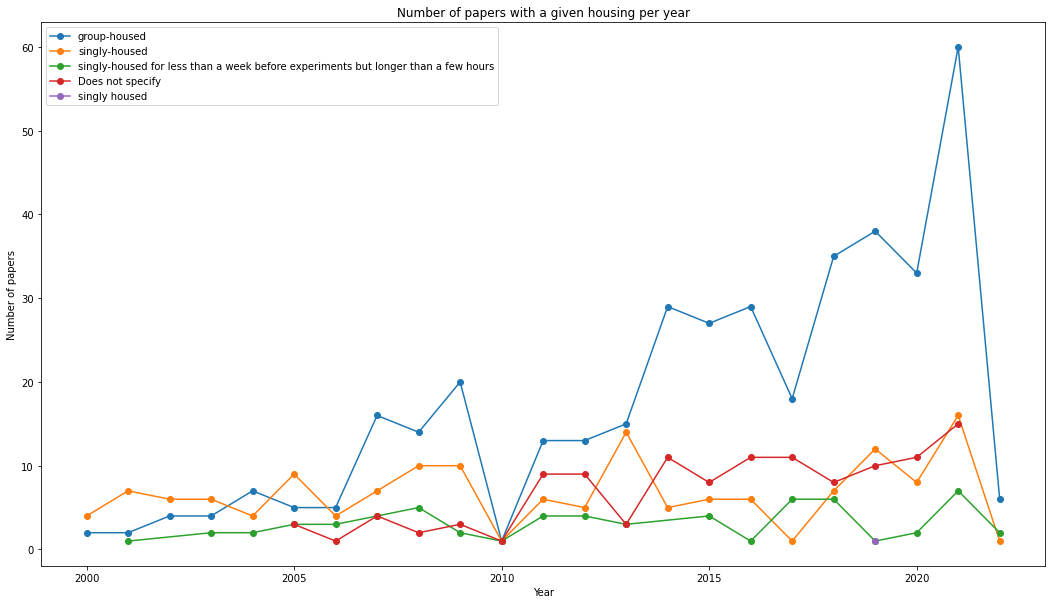

In [73]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given housing per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_housing.png")


## Trends in Age of the Subject

In [74]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

array(['5 min exposure or less', '5 min exposure or less, littermate',
       '15 minutes', '5 min exposure or less, 10 minutes',
       '5 min exposure or less, 10 minutes, 60 minutes',
       '5 min exposure or less, 60 minutes',
       '5 min exposure or less, 15 minutes, 60 minutes',
       '5 min exposure or less, 15 minutes', '30 minutes',
       '10 minutes,12 minutes',
       '5 min exposure or less, 15 minutes, littermate',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)',
       'Does not specify', 'littermate',
       'littermate; 5 min exposure or less', '20 minutes',
       '5 min exposure or less, 20 minutes',
       '5 min exposure or less, 9 minutes', 'not specified', 'offspring ',
       '10 minutes', '8 minutes', '7 minutes', '80 minutes',
       'cage mate, 15 minutes, 20 minutes', '60 minutes',
       '6 minutes, cage mate', '6 minutes', 'parent (mother)',
       '5 min exposure or less, 8 minutes', '10 minutes, 15 minutes',
       '7

In [75]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

0                  5 min exposure or less
1                  5 min exposure or less
2                  5 min exposure or less
3                  5 min exposure or less
4                  5 min exposure or less
                      ...                
644    5 min exposure or less, littermate
645    10 minutes, 12 minutes, littermate
646                10 minutes, littermate
647                10 minutes, littermate
648                           Unspecified
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) , Length: 649, dtype: object

In [76]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [77]:
fixed_column_name = column_name + "_fixed"

In [78]:
copy_of_survey_df = survey_df.copy()

In [79]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [80]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [81]:
exploded_column_df


,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed"
0,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,...,,,,,2006,0,1,[LONGEVAN],[LONGEVAN],5 min exposure or less
1,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,...,,,,,2006,0,1,[WISTER],[WISTER],5 min exposure or less
2,2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,...,,,,,2006,1,0,[ICR],[ICR],5 min exposure or less
3,3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,...,,,,,2006,0,1,[WISTER],[WISTER],5 min exposure or less
4,4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,...,,,,,2006,1,0,[CD1],[CD1],5 min exposure or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,646,3/23/2022 18:54:10,A Temporal Activity of CA1 Neurons Underlying ...,"Chai, An-Ping",2021-07,Erika Wangia,,yes,Mice,no,...,"Yes, this one was tricky.",I am unsure about the subject's age.,,,2021,1,0,[C57BL6],[C57BL6],10 minutes
703,646,3/23/2022 18:54:10,A Temporal Activity of CA1 Neurons Underlying ...,"Chai, An-Ping",2021-07,Erika Wangia,,yes,Mice,no,...,"Yes, this one was tricky.",I am unsure about the subject's age.,,,2021,1,0,[C57BL6],[C57BL6],littermate
704,647,4/28/2022 17:50:43,Phospholipase D1 Ablation Disrupts Mouse Longi...,"Santa-Marinha, Luisa",2020-03,Ezra Wright,,yes,Mice,no,...,"No, I feel confident, and I double-checked all...",,,,2020,1,0,[C57BL6],[C57BL6],10 minutes
705,647,4/28/2022 17:50:43,Phospholipase D1 Ablation Disrupts Mouse Longi...,"Santa-Marinha, Luisa",2020-03,Ezra Wright,,yes,Mice,no,...,"No, I feel confident, and I double-checked all...",,,,2020,1,0,[C57BL6],[C57BL6],littermate


In [82]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [83]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

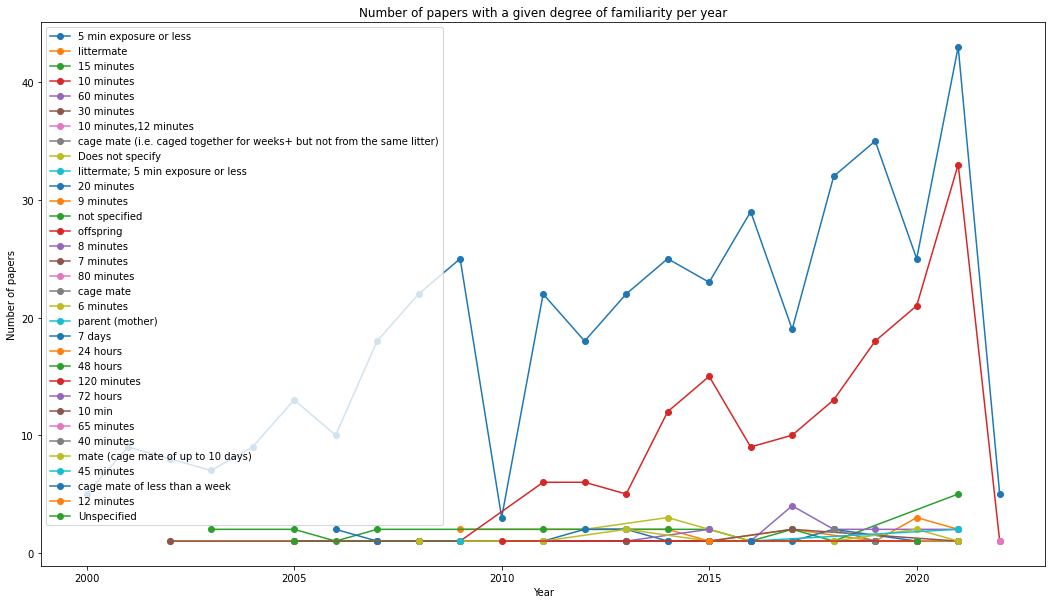

In [84]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given degree of familiarity per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_familiarity.png")

## Trends in Type of the Subject

In [85]:
survey_df["Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"]

0      yes
1       no
2      yes
3       no
4       no
      ... 
644    yes
645    yes
646    yes
647    yes
648    yes
Name: Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject, Length: 649, dtype: object

In [86]:
column_name = "Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"

In [87]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [88]:
type_year_count

,publication_year,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,2000,no,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2000,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2001,no,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,2001,yes,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2002,no,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5,2002,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,2003,no,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
7,2003,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,2004,no,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
9,2004,yes,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [89]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

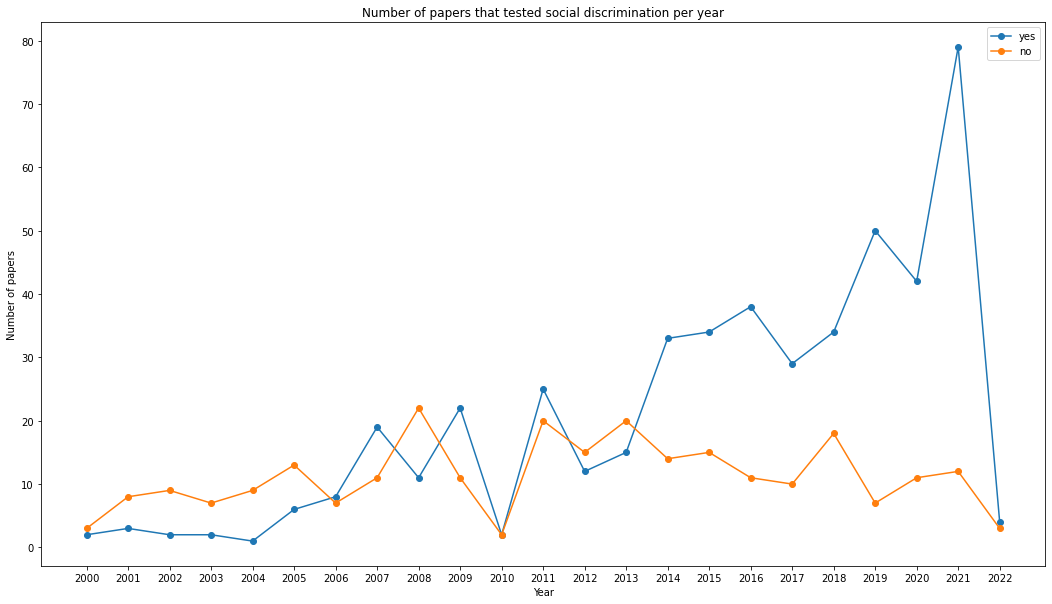

In [90]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers that tested social discrimination per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_discrimination.png")

## Trends in Type of the Subject

In [91]:
survey_df["Subject Social Rank"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
644    Does not specify
645    Does not specify
646    Does not specify
647    Does not specify
648    Does not specify
Name: Subject Social Rank, Length: 649, dtype: object

In [92]:
column_name = "Subject Social Rank"

In [93]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [94]:
type_year_count

,publication_year,Subject Social Rank,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,2000,"Defeated, Does not specify",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2000,Does not specify,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2001,Defeated,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2001,Does not specify,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,2002,Does not specify,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
5,2003,Does not specify,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6,2004,Does not specify,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
7,2005,Does not specify,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
8,2006,Does not specify,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
9,2007,Does not specify,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [95]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

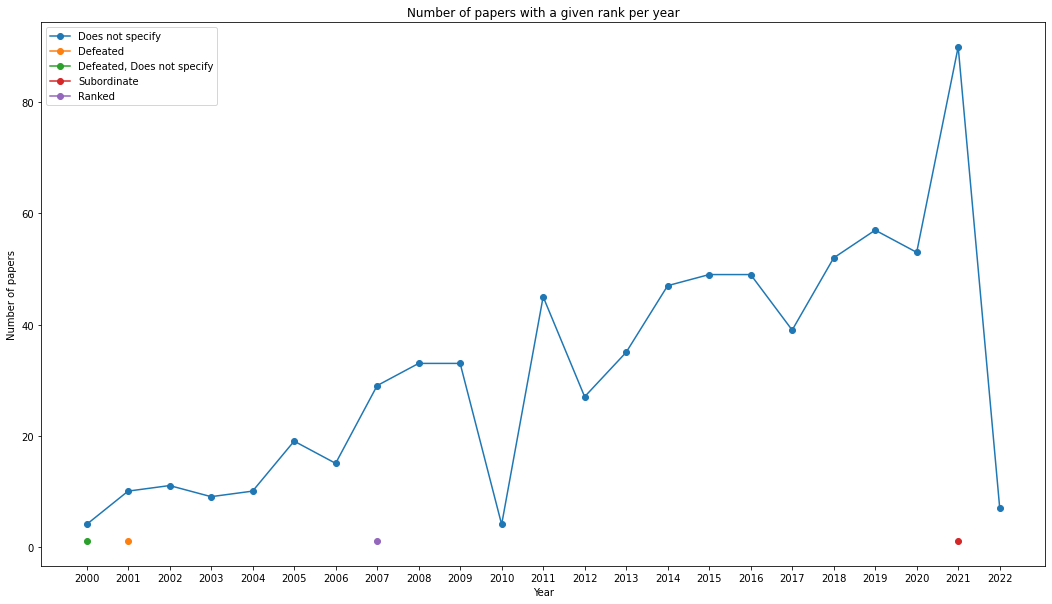

In [96]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given rank per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/year_vs_rank.png")

## ITI by Species

In [97]:
survey_df["Intertrial Interval (ITI) (time between trials)"]

0                                                 1-6 hr
1                 over 5 min - less than an hour, 1-6 hr
2                                      over 6 hr - 24 hr
3                         over 5 min - less than an hour
4                         over 5 min - less than an hour
                             ...                        
644                       over 5 min - less than an hour
645                                          1-5 minutes
646    1-5 minutes, over 5 min - less than an hour, 1...
647                                not specified, no ITI
648                                        not specified
Name: Intertrial Interval (ITI) (time between trials), Length: 649, dtype: object

In [98]:
column_name = "Intertrial Interval (ITI) (time between trials)"

In [99]:
fixed_column_name = column_name + "_fixed"

In [100]:
copy_of_survey_df = survey_df.copy()

In [101]:
copy_of_survey_df[column_name]

0                                                 1-6 hr
1                 over 5 min - less than an hour, 1-6 hr
2                                      over 6 hr - 24 hr
3                         over 5 min - less than an hour
4                         over 5 min - less than an hour
                             ...                        
644                       over 5 min - less than an hour
645                                          1-5 minutes
646    1-5 minutes, over 5 min - less than an hour, 1...
647                                not specified, no ITI
648                                        not specified
Name: Intertrial Interval (ITI) (time between trials), Length: 649, dtype: object

In [102]:
#copy_of_survey_df[ pd.api.types.is_float_dtype(copy_of_survey_df[column_name])]

In [103]:
def debugfunc(x):
    print(x)
    return x.split(", ")


In [104]:
copy_of_survey_df[column_name]

0                                                 1-6 hr
1                 over 5 min - less than an hour, 1-6 hr
2                                      over 6 hr - 24 hr
3                         over 5 min - less than an hour
4                         over 5 min - less than an hour
                             ...                        
644                       over 5 min - less than an hour
645                                          1-5 minutes
646    1-5 minutes, over 5 min - less than an hour, 1...
647                                not specified, no ITI
648                                        not specified
Name: Intertrial Interval (ITI) (time between trials), Length: 649, dtype: object

In [105]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))

1-6 hr
over 5 min - less than an hour, 1-6 hr
over 6 hr - 24 hr
over 5 min - less than an hour
over 5 min - less than an hour
over 5 min - less than an hour, over 6 hr - 24 hr
over 5 min - less than an hour, 1-6 hr, over 6 hr - 24 hr
over 5 min - less than an hour
over 6 hr - 24 hr
no ITI, over 5 min - less than an hour
not specified
1-6 hr
over 5 min - less than an hour
1-6 hr
over 5 min - less than an hour, 1-6 hr
1-6 hr
not specified
not specified
over 5 min - less than an hour
1-6 hr
over 5 min - less than an hour
1-6 hr
1-6 hr, over 6-24 hr
1-6 hr
over 5 min - less than an hour
over 5 min - less than an hour
over 5 min - less than an hour
over 6 hr - 24 hr
over 5 min - less than an hour
1-5 minutes
1-5 minutes
over 6 hr - 24 hr
1-6 hr
over 5 min - less than an hour
over 5 min - less than an hour
1-5 minutes
1-6 hr
over 5 min - less than an hour, over 6 hr - 24 hr
not specified
1-5 minutes
no ITI
not specified
over 5 min - less than an hour
over 5 min - less than an hour
over 5 min

In [106]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [107]:
column_rats_count = exploded_column_df.groupby(['Rats used', fixed_column_name], as_index=False).count()

In [108]:
column_mice_count = exploded_column_df.groupby(['Mice used', fixed_column_name], as_index=False).count()

In [109]:
edit_column_rats_count = column_rats_count[column_rats_count["Rats used"] == "1"]

In [110]:
rat_count = edit_column_rats_count["index"].sum()

In [111]:
rat_count

331

In [112]:
edit_column_mice_count = column_mice_count[column_mice_count["Mice used"] == "1"]

In [113]:
mouse_count = edit_column_mice_count["index"].sum()

In [114]:
mouse_count

482

In [115]:
edit_column_mice_count = edit_column_mice_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [116]:
edit_column_rats_count = edit_column_rats_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [117]:
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
1-5 minutes,1,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
1-5minutes,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1-6 hr,1,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
5 min - less than an hour,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6 hr - 24 hr,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Does not specify,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
no ITI,1,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
not specified,1,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
over 24 hrs,1,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [118]:
edit_column_mice_count = edit_column_mice_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [119]:
edit_column_rats_count = edit_column_rats_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [120]:
#edit_column_mice_count["Intertrial Interval (ITI) (time between trials)_fixed"]

In [121]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].mul(100)
edit_column_rats_count["index"] = edit_column_rats_count["index"].mul(100)
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
no ITI,1,2400.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
1-5 minutes,1,5000.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
+5 min - less than an hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-6 hr,1,7300.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0
over 6 hr - 24 hr,1,7000.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
over 24 hrs,1,1100.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
not specified,1,10100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,...,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0


In [122]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].div(484)
edit_column_rats_count["index"] = edit_column_rats_count["index"].div(345)
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
no ITI,1,4.958678,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
1-5 minutes,1,10.330579,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
+5 min - less than an hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-6 hr,1,15.082645,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0
over 6 hr - 24 hr,1,14.462810,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
over 24 hrs,1,2.272727,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
not specified,1,20.867769,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,...,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0


In [123]:
plt.rcParams["figure.figsize"] = (18,10)

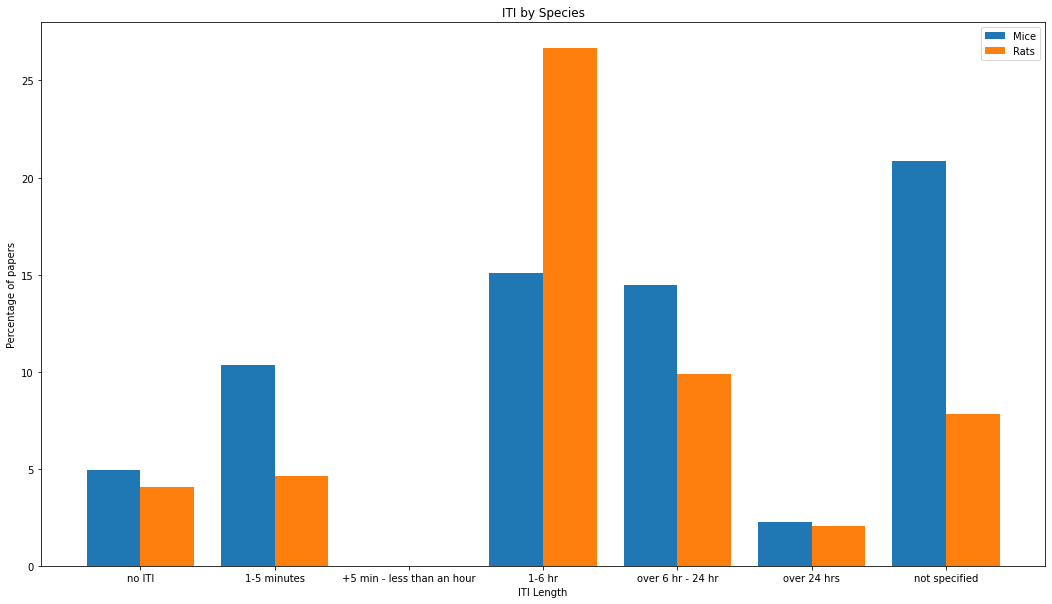

In [124]:
_ITI = np.arange(len(edit_column_rats_count.index))

plt.bar(_ITI - 0.2, edit_column_mice_count["index"], 0.4, label = "Mice")
plt.bar(_ITI + 0.2, edit_column_rats_count["index"], 0.4, label = "Rats")
plt.xticks(_ITI, edit_column_rats_count.index)
plt.legend()
plt.title("ITI by Species")
plt.xlabel("ITI Length")
plt.ylabel("Percentage of papers")
plt.savefig("./proc/ITIbyspecies.png")

# Degree of Familiarity

In [125]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

0                  5 min exposure or less
1                  5 min exposure or less
2                  5 min exposure or less
3                  5 min exposure or less
4                  5 min exposure or less
                      ...                
644    5 min exposure or less, littermate
645    10 minutes, 12 minutes, littermate
646                10 minutes, littermate
647                10 minutes, littermate
648                           Unspecified
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) , Length: 649, dtype: object

In [126]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [127]:
fixed_column_name = column_name + "_fixed"

In [128]:
copy_of_survey_df = survey_df.copy()

In [129]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [130]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [131]:
column_degree_count = exploded_column_df.groupby([fixed_column_name], as_index=False).count()

In [132]:
column_degree_count

,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed",index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,10 min,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,10 minutes,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
2,"10 minutes,12 minutes",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,12 minutes,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,120 minutes,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,15 minutes,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6,20 minutes,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
7,24 hours,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,30 minutes,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,40 minutes,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Social Agent Ages by Sex

In [133]:
survey_df["Social Agent Sex"]

0            same sex as subject, always male
1          same sex as subject, always female
2      opposite sex as subject, always female
3            same sex as subject, always male
4          same sex as subject, always female
                        ...                  
644                                 Uses both
645          same sex as subject, always male
646          same sex as subject, always male
647          same sex as subject, always male
648            same sex as subject, Uses both
Name: Social Agent Sex, Length: 649, dtype: object

In [134]:
survey_df["Social Agent Age (check all that apply)"]

0             juvenile (3-7 weeks or week not specified)
1             juvenile (3-7 weeks or week not specified)
2                                       Does not specify
3             juvenile (3-7 weeks or week not specified)
4                                    adult (12-24 weeks)
                             ...                        
644    juvenile (3-7 weeks or week not specified), ad...
645           juvenile (3-7 weeks or week not specified)
646                             young adult (8-12 weeks)
647                                  adult (12-24 weeks)
648        young adult (8-12 weeks), adult (12-24 weeks)
Name: Social Agent Age (check all that apply), Length: 649, dtype: object

In [135]:
column_name = "Social Agent Sex"
column_name_2 = "Social Agent Age (check all that apply)"

In [136]:
fixed_column_name = column_name + "_fixed"
fixed_column_name_2 = column_name_2 + "_fixed"

In [137]:
copy_of_survey_df = survey_df.copy()

In [138]:
def debugfunc(x):
    print(x)
    return x.split(", ")

In [139]:
copy_of_survey_df[column_name]
copy_of_survey_df[column_name_2]

0             juvenile (3-7 weeks or week not specified)
1             juvenile (3-7 weeks or week not specified)
2                                       Does not specify
3             juvenile (3-7 weeks or week not specified)
4                                    adult (12-24 weeks)
                             ...                        
644    juvenile (3-7 weeks or week not specified), ad...
645           juvenile (3-7 weeks or week not specified)
646                             young adult (8-12 weeks)
647                                  adult (12-24 weeks)
648        young adult (8-12 weeks), adult (12-24 weeks)
Name: Social Agent Age (check all that apply), Length: 649, dtype: object

In [140]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))
copy_of_survey_df[fixed_column_name_2] = copy_of_survey_df[column_name_2].apply(lambda x: debugfunc(x))

same sex as subject, always male
same sex as subject, always female
opposite sex as subject, always female
same sex as subject, always male
same sex as subject, always female
same sex as subject, always male
Uses both
same sex as subject, opposite sex as subject, Uses both
always male
same sex as subject, always male
always male
always male
always male
Does not specify
same sex as subject, always male
same sex as subject, always male
same sex as subject, always male
Does not specify
same sex as subject, always female
always female
same sex as subject, always female
same sex as subject, always male
same sex as subject, always male
same sex as subject, always male
same sex as subject, always male
Does not specify
same sex as subject, always male
same sex as subject, always female
always male
always female
Does not specify
same sex as subject, always male
same sex as subject, Uses both
Does not specify
same sex as subject, always male
same sex as subject, always male
same sex as subject, 

In [141]:
copy_of_survey_df

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Social Agent Age (check all that apply)_fixed
0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,no,Long-Evan,...,,,,2006,0,1,[LONGEVAN],[LONGEVAN],"[same sex as subject, always male]",[juvenile (3-7 weeks or week not specified)]
1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,no,Wister,...,,,,2006,0,1,[WISTER],[WISTER],"[same sex as subject, always female]",[juvenile (3-7 weeks or week not specified)]
2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,no,ICR,...,,,,2006,1,0,[ICR],[ICR],"[opposite sex as subject, always female]",[Does not specify]
3,2/23/2022 17:09:55,Pilocarpine improves olfactory discrimination ...,"Prediger, Rui",2006-02,Meghan Cum,,yes,Rats,no,Wister,...,,,,2006,0,1,[WISTER],[WISTER],"[same sex as subject, always male]",[juvenile (3-7 weeks or week not specified)]
4,2/23/2022 17:42:42,A social recognition test for female mice reve...,"Venerosi, Aldina",2006-08,Meghan Cum,,yes,Mice,no,CD-1,...,,,,2006,1,0,[CD1],[CD1],"[same sex as subject, always female]",[adult (12-24 weeks)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,4/19/2022 11:37:06,The positive allosteric modulator of the mGlu2...,"Martinez-Pinteno, Albert",2020-07,Ezra Wright,"Ezra, good",yes,Mice,no,C57BL/6J,...,I don't feel like sex of the mice was clarifie...,,,2020,1,0,[C57BL6J],[C57BL6J],[Uses both],"[juvenile (3-7 weeks or week not specified), a..."
645,3/21/2022 14:02:30,Synaptic P-Rex1 signaling regulates hippocampa...,"Li, Jun",2015-12,Meghan Cum,,yes,Mice,no,C57BL6,...,,,,2015,1,0,[C57BL6],[C57BL6],"[same sex as subject, always male]",[juvenile (3-7 weeks or week not specified)]
646,3/23/2022 18:54:10,A Temporal Activity of CA1 Neurons Underlying ...,"Chai, An-Ping",2021-07,Erika Wangia,,yes,Mice,no,C57BL/6,...,I am unsure about the subject's age.,,,2021,1,0,[C57BL6],[C57BL6],"[same sex as subject, always male]",[young adult (8-12 weeks)]
647,4/28/2022 17:50:43,Phospholipase D1 Ablation Disrupts Mouse Longi...,"Santa-Marinha, Luisa",2020-03,Ezra Wright,,yes,Mice,no,C57BL/6,...,,,,2020,1,0,[C57BL6],[C57BL6],"[same sex as subject, always male]",[adult (12-24 weeks)]


In [142]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()
exploded_column_df = exploded_column_df.explode(fixed_column_name_2).reset_index()

In [143]:
exploded_column_df

,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Social Agent Age (check all that apply)_fixed
0,0,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,...,,,,2006,0,1,[LONGEVAN],[LONGEVAN],same sex as subject,juvenile (3-7 weeks or week not specified)
1,1,0,2/22/2022 16:02:04,"BGC20-761, a novel tryptamine analog, enhances...","Mitchell, Ellen",2006-03,Meghan Cum,,yes,Rats,...,,,,2006,0,1,[LONGEVAN],[LONGEVAN],always male,juvenile (3-7 weeks or week not specified)
2,2,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,...,,,,2006,0,1,[WISTER],[WISTER],same sex as subject,juvenile (3-7 weeks or week not specified)
3,3,1,2/23/2022 16:43:21,Effects of 17 b-estradiol and extremely low-fr...,"Reyes-Guerrero, Gloria",2006-06,Meghan Cum,,yes,Rats,...,,,,2006,0,1,[WISTER],[WISTER],always female,juvenile (3-7 weeks or week not specified)
4,4,2,2/23/2022 16:56:10,Effects of histamine H3 antagonists and donepe...,"Jia, Feiyong",2006-03,Meghan Cum,,yes,Mice,...,,,,2006,1,0,[ICR],[ICR],opposite sex as subject,Does not specify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1100,647,4/28/2022 17:50:43,Phospholipase D1 Ablation Disrupts Mouse Longi...,"Santa-Marinha, Luisa",2020-03,Ezra Wright,,yes,Mice,...,,,,2020,1,0,[C57BL6],[C57BL6],always male,adult (12-24 weeks)
1235,1101,648,4/19/2022 16:12:56,Trappc9 deficiency causes parent-of-origin dep...,"Liang, Zhengzheng",2020-09,Ezra Wright,"Ezra, good",yes,Mice,...,Times during three chamber test and degree of ...,,,2020,1,0,[C57BL6J],[C57BL6J],same sex as subject,young adult (8-12 weeks)
1236,1101,648,4/19/2022 16:12:56,Trappc9 deficiency causes parent-of-origin dep...,"Liang, Zhengzheng",2020-09,Ezra Wright,"Ezra, good",yes,Mice,...,Times during three chamber test and degree of ...,,,2020,1,0,[C57BL6J],[C57BL6J],same sex as subject,adult (12-24 weeks)
1237,1102,648,4/19/2022 16:12:56,Trappc9 deficiency causes parent-of-origin dep...,"Liang, Zhengzheng",2020-09,Ezra Wright,"Ezra, good",yes,Mice,...,Times during three chamber test and degree of ...,,,2020,1,0,[C57BL6J],[C57BL6J],Uses both,young adult (8-12 weeks)


In [144]:
exploded_column_df["Male Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always male" or x == "Uses both" else "0")
exploded_column_df["Female Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always female" or x == "Uses both" else "0")

In [145]:
column_male_count = exploded_column_df.groupby(['Male Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_male_count = column_male_count[column_male_count["Male Social Agent"] == "1"]

column_female_count = exploded_column_df.groupby(['Female Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_female_count = column_female_count[column_female_count["Female Social Agent"] == "1"]

edit_column_male_count

,Male Social Agent,Social Agent Age (check all that apply)_fixed,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)",...,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Female Social Agent
10,1,Does not specify,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
11,1,adult (12-24 weeks),48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
12,1,adult (24-40 weeks),25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
13,1,adult (week not specified),22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
14,1,infant (0-21 days),5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
15,1,juvenile (3-7 weeks or week not specified),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,1,juvenile (3-7 weeks or week not specified),279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
17,1,old (+40 weeks),6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
18,1,same as subject,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
19,1,young adult (8-12 weeks),60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60


In [146]:
edit_column_female_count

,Female Social Agent,Social Agent Age (check all that apply)_fixed,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)",...,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Unnamed: 30,Unnamed: 31,publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Male Social Agent
10,1,Does not specify,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
11,1,adult (12-24 weeks),38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
12,1,adult (24-40 weeks),15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
13,1,adult (week not specified),25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
14,1,juvenile (3-7 weeks or week not specified),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15,1,juvenile (3-7 weeks or week not specified),78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
16,1,old (+40 weeks),5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
17,1,young adult (8-12 weeks),36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [147]:
exploded_column_df["Same Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "same sex as subject" else "0")
exploded_column_df["Opposite Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "opposite sex as subject" else "0")

In [148]:
column_same_count = exploded_column_df.groupby(['Same Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_same_count = column_same_count[column_same_count["Same Sex Social Agent"] == "1"]

column_opposite_count = exploded_column_df.groupby(['Opposite Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_opposite_count = column_opposite_count[column_opposite_count["Opposite Sex Social Agent"] == "1"]

In [149]:
infant_dict = {"Opposite Sex Social Agent": ["1"], "Social Agent Age (check all that apply)_fixed": ["infant (0-21 days)"], "size": [0]}
  
infant_df = pd.DataFrame.from_dict(infant_dict)
  
edit_column_opposite_count = pd.concat([edit_column_opposite_count, infant_df], ignore_index = True)


In [150]:
edit_column_opposite_count


,Opposite Sex Social Agent,Social Agent Age (check all that apply)_fixed,size
0,1,Does not specify,28
1,1,adult (12-24 weeks),9
2,1,adult (24-40 weeks),4
3,1,adult (week not specified),9
4,1,juvenile (3-7 weeks or week not specified),1
5,1,juvenile (3-7 weeks or week not specified),11
6,1,old (+40 weeks),2
7,1,young adult (8-12 weeks),10
8,1,infant (0-21 days),0


In [151]:
edit_column_male_count = edit_column_male_count.set_index(fixed_column_name_2, inplace=False) 
edit_column_female_count = edit_column_female_count.set_index(fixed_column_name_2, inplace=False) 

In [152]:
edit_column_same_count = edit_column_same_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 
edit_column_opposite_count = edit_column_opposite_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 

In [153]:
edit_column_opposite_count

,Opposite Sex Social Agent,size
Social Agent Age (check all that apply)_fixed,,
Does not specify,1,28
adult (12-24 weeks),1,9
adult (24-40 weeks),1,4
adult (week not specified),1,9
juvenile (3-7 weeks or week not specified),1,1
juvenile (3-7 weeks or week not specified),1,11
old (+40 weeks),1,2
young adult (8-12 weeks),1,10
infant (0-21 days),1,0


In [154]:
edit_column_male_count = edit_column_male_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_female_count = edit_column_female_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_same_count = edit_column_same_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_opposite_count = edit_column_opposite_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])


In [155]:
edit_column_male_count["index"].sum()

445.0

In [156]:
edit_column_female_count["index"].sum()

197.0

In [157]:
plt.rcParams["figure.figsize"] = (18,10)

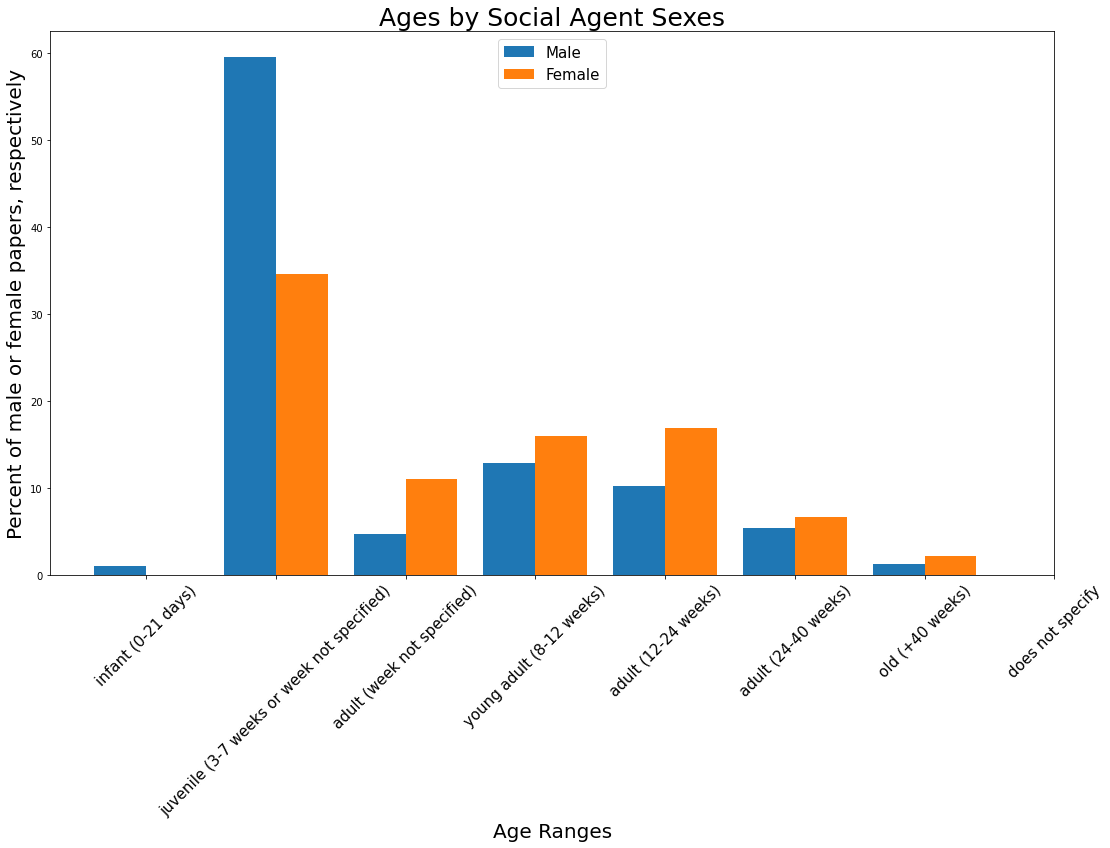

In [158]:
_ITI = np.arange(len(edit_column_male_count.index))

plt.bar(_ITI - 0.2, edit_column_male_count["index"] / 469 * 100, 0.4, label = "Male")
plt.bar(_ITI + 0.2, edit_column_female_count["index"] / 226 * 100, 0.4, label = "Female")
plt.xticks(_ITI, edit_column_male_count.index)
plt.legend(fontsize= 15)
plt.xticks(rotation=45, fontsize = 15)
plt.title("Ages by Social Agent Sexes", fontsize = 25)
plt.xlabel("Age Ranges", fontsize = 20)
plt.ylabel("Percent of male or female papers, respectively", fontsize = 20)
plt.savefig("./proc/AgebySASex.png")

In [159]:
edit_column_opposite_count["size"].sum()

45.0

In [160]:
edit_column_same_count["size"].sum()

397.0

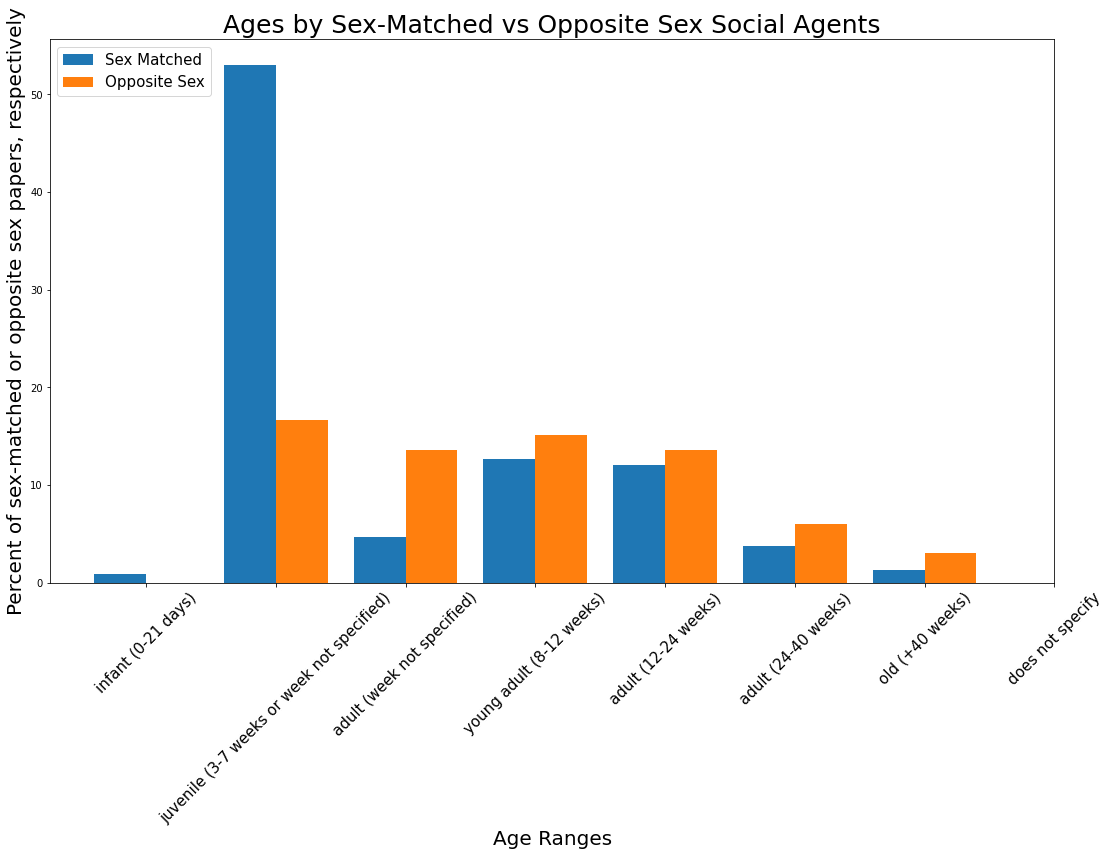

In [161]:
_ITI = np.arange(len(edit_column_same_count.index))

plt.bar(_ITI - 0.2, edit_column_same_count["size"] / 449 * 100, 0.4, label = "Sex Matched")
plt.bar(_ITI + 0.2, edit_column_opposite_count["size"] / 66 * 100, 0.4, label = "Opposite Sex")
plt.xticks(_ITI, edit_column_same_count.index)
plt.legend(fontsize = 15)
plt.xticks(rotation=45, fontsize=15)
plt.title("Ages by Sex-Matched vs Opposite Sex Social Agents", fontsize=25)
plt.xlabel("Age Ranges", fontsize=20)
plt.ylabel("Percent of sex-matched or opposite sex papers, respectively", fontsize=20)
plt.savefig("./proc/AgebySASexMatch.png")